In [11]:
%matplotlib inline
import json
import numpy as np
import os
import skimage.io
import cv2
import urllib
import urlparse
import matplotlib.pyplot as plt

In [8]:
dataset_dir = '../../data/images/fish_detection/'

In [3]:
j = json.load(open('../../data/annotations/fish_detection/labelbox.json', 'r'))

In [4]:
a = j[0]

In [6]:
np.array([(p['x'], p['y']) for p in a['Label']['fish'][0]])

array([[436, 429],
       [406, 400],
       [387, 362],
       [356, 347],
       [377, 338],
       [369, 249],
       [379, 193],
       [338, 152],
       [379, 164],
       [411, 139],
       [390, 191],
       [414, 226],
       [434, 264],
       [456, 278],
       [442, 302],
       [450, 370],
       [444, 410]])

In [12]:
if not isinstance(a['Label'], dict) and 'fish' not in a['Label']:
    assert 1
image_id = os.path.basename(urllib.unquote(urlparse.urlparse(a['Labeled Data']).path))
image_path = os.path.join(dataset_dir, image_id)
image = skimage.io.imread(image_path)
height, width = image.shape[:2]
polygons = a['Label']['fish']


In [13]:
polygon = np.array([(p['x'], height - p['y']) for p in polygons[0]])  # CAUTION!!! must reverse y axis

In [14]:
x, y, w, h = cv2.boundingRect(polygon)

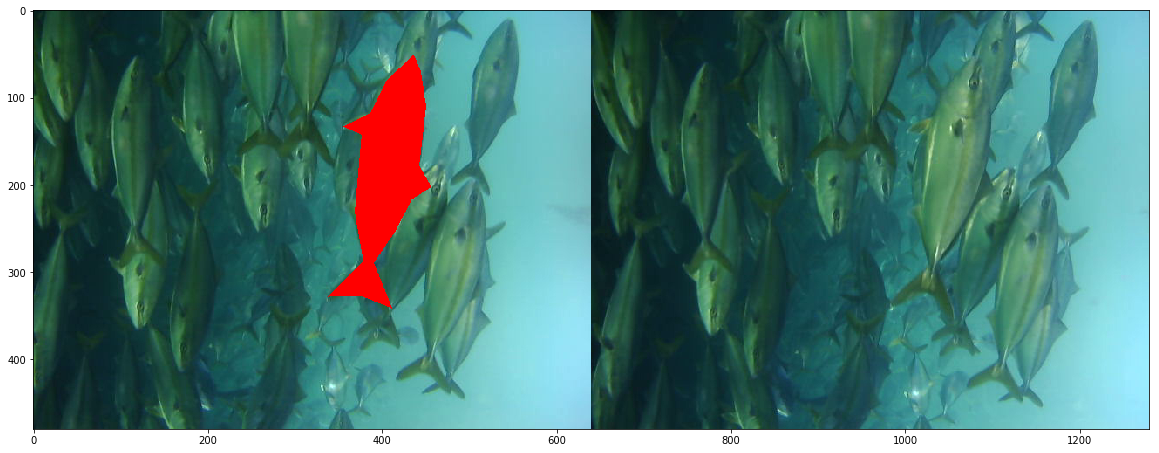

In [16]:
cv2.fillConvexPoly(image, polygon, (255, 0, 0))

plt.figure(figsize=(20,10))
plt.imshow(image)